In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast
from collections import defaultdict

In [2]:
#load skincare ingredient dictionary, df
skincare_ingredients = pd.read_csv('skincare ingredient dictionary.csv', index_col=0)
df = pd.read_csv('df cleaned.csv', index_col= 0)

In [3]:
skincare_ingredients

,ingredient,category,description,rating
0,"1, 2-hexanediol",preservatives,A preservative belonging to a class of agents ...,Good
1,10-hydroxydecanoic acid,emollients,A synthetic ingredient that functions as a ski...,Good
2,4-t-butylcyclohexanol,"emollients, skin-soothing",NaN,Good
3,acacia farnesiana extract,"plant extracts, fragrance: synthetic and fragr...",A fragrant extract from a type of acacia tree....,Poor
4,acacia senegal gum,"texture enhancer, plant extracts, skin-soothing","Herb that can have skin soothing properties, b...",Good
...,...,...,...,...
1828,zinc sulfate,"preservatives, sensitizing",Chemical compound resulting from the interacti...,Poor
1829,zingiberaceae,"skin-soothing, sensitizing, plant extracts",NaN,Poor
1830,zingiber officinale roscoe,"skin-soothing, plant extracts, sensitizing",NaN,Average
1831,zingiber zerumbet,"skin-soothing, plant extracts, sensitizing",NaN,Poor


In [5]:
df.head()

,url,category,brand,name,rating,price,descriptions,productsize,ingredient_list,num_ingredients,...,dry,oily,combination,sensitive,redness,acne,aging,spots,dull,normal
0,https://www.sephora.com/product/kale-spinach-g...,cleanser,Youth To The People,Superfood Antioxidant Cleanser,4.3,36.0,what it is: an award-winning face wash with co...,8 oz,"['water', 'cocamidopropyl hydroxysultaine', 's...",29,...,True,True,True,False,False,False,True,False,True,True
1,https://www.sephora.com/product/soy-face-clean...,cleanser,Fresh,Soy Makeup Removing Face Wash,4.4,38.0,what it is: a bestselling three-in-one face wa...,5.1 oz,"['water', 'coco-glucoside', 'glycerin', 'butyl...",38,...,True,True,True,True,False,False,False,False,True,True
2,https://www.sephora.com/product/green-clean-ma...,cleanser,Farmacy,Green Clean Makeup Removing Cleansing Balm,4.5,34.0,what it is: a makeup remover and face cleanser...,3.4 oz,"['cetyl ethylhexanoate', 'caprylic/capric trig...",33,...,True,True,True,False,False,False,True,False,True,True
3,https://www.sephora.com/product/the-deep-clean...,cleanser,Tatcha,The Deep Cleanse Gentle Exfoliating Cleanser,4.2,38.0,which skin type is it good for?\n✔ normal\n✔ o...,5 oz,"['water', 'sodium cocoyl glutamate', 'propaned...",22,...,True,True,True,True,False,False,False,False,True,True
4,https://www.sephora.com/product/tatcha-the-ric...,cleanser,Tatcha,The Rice Wash Skin-Softening Cleanser,4.6,35.0,"what it is: a ph-neutral, daily cream cleanser...",4.0 oz,"['aqua/water/eau', 'microcrystalline cellulose...",23,...,True,False,True,False,False,False,False,False,False,True


In [6]:
df['ingredient_list'] = df.ingredient_list.apply(ast.literal_eval)

In [7]:
#value counts of ingredient ratings
skincare_ingredients.rating.value_counts()

Good       871
Best       546
Poor       268
Average    147
GOOD         1
Name: rating, dtype: int64

In [8]:
#change GOOD to Good
skincare_ingredients.loc[skincare_ingredients[skincare_ingredients.rating == 'GOOD'].index, 'rating'] = 'Good'

In [10]:
#map word ratings to values
mapping = {'Poor':-1, 'Average':1, 'Good': 3, 'Best':5}
skincare_ingredients['rating_num'] = skincare_ingredients.rating.map(mapping)

In [12]:
#clean up ingredient_list
def func(lst):
    fixed = []
    for phrase in lst:
        phrase = phrase.lower() #make all lowercase
        phrase = phrase.replace('.', '') #remove periods
        phrase = phrase.replace('*', '') #remove astrix
        phrase = phrase.strip() #strip leading/trailing whitespace
        fixed.append(phrase)
    return fixed

df['ingredient_list'] = df.ingredient_list.apply(func)

In [13]:
#create a list of ingredient names which are contained in other ingredients 
for i in skincare_ingredients.ingredient:
    for j in skincare_ingredients.ingredient:
        if (j in i) and i!= j:
            print (i,',', j)
problem_ingredients = ['acid', 'alcohol', 'ethanol', 'pha', 'tea', 'glycol', 'gla', 'lye', 'age', 'mea']

10-hydroxydecanoic acid , acid
acetic acid , acid
acetylated castor oil , castor oil
acetylated lanolin , lanolin
acetylated lanolin alcohol , acetylated lanolin
acetylated lanolin alcohol , alcohol
acetylated lanolin alcohol , lanolin
acetylated lanolin alcohol , lanolin alcohol
acetyl carnitine hcl , carnitine
acetyl glyceryl ricinoleate , ricinoleate
acne soap , soap
acrylates/c10-30 alkyl acrylate crosspolymer , acrylate
acrylates/c10-30 alkyl acrylate crosspolymer , polymer
acrylates/dimethicone copolymer , acrylate
acrylates/dimethicone copolymer , dimethicone
acrylates/dimethicone copolymer , methicone
acrylates/dimethicone copolymer , polymer
acrylates/steareth-20 methacrylate copolymer , acrylate
acrylates/steareth-20 methacrylate copolymer , polymer
acrylates/steareth-20 methacrylate copolymer , steareth-20
acrylates/steareth-20 methacrylate copolymer , tea
acrylates copolymer , acrylate
acrylates copolymer , polymer
adenosine phosphate , adenosine
adenosine phosphate , pha
a

glycyrrhetic acid , acid
glycyrrhetinic acid , acid
glycyrrhiza glabra , gla
green tea , tea
hesperidin methyl chalcone , hesperidin
hexanoyl dipeptide-3 norleucine acetate , leucine
hippophae rhamnoides , pha
hippophae rhamnoides (seaberry) fruit extract , hippophae rhamnoides
hippophae rhamnoides (seaberry) fruit extract , pha
honey extract , honey
honeysuckle flower extract , honey
hyaluronic acid , acid
hydnocarpus anthelmintica , mint
hydrogenated lecithin , lecithin
hydrogenated polyisobutene , polyisobutene
hydrolyzed algae extract , algae
hydrolyzed algae extract , algae extract
hydrolyzed glycosaminoglycans , glycosaminoglycans
hydrolyzed jojoba esters , ester
hydrolyzed jojoba esters , jojoba esters
hydrolyzed pumpkin seedcake , pumpkin
hydrolyzed rhodophycea (red algae) extract , algae
hydrolyzed rhodophycea (red algae) extract , red algae
hydrolyzed silk , silk
hydrolyzed wheat protein , wheat protein
hydroxyethyl acrylate/sodium acryloyl dimethyl taurate copolymer , acryla

sodium tallowate , tallow
soothing agent , age
sorbic acid , acid
sorbitan sesquioleate , sesquioleate
sorbitan stearate , tea
soy isoflavones , isoflavone
spearmint oil , mint
sphingolipids , lipid
spiraea ulmaria (meadowsweet) extract , mea
star anise , anise
steapyrium chloride , tea
stearalkonium chloride , tea
stearalkonium hectorite , hectorite
stearalkonium hectorite , tea
stearates , tea
steareth-20 , tea
stearic acid , acid
stearic acid , tea
stearyl alcohol , alcohol
stearyl alcohol , tea
stearyl dimethicone , dimethicone
stearyl dimethicone , methicone
stearyl dimethicone , tea
stearyl glycyrrhetinate , tea
stearyl methicone , methicone
stearyl methicone , tea
stearyl stearate , tea
styrene/acrylates copolymer , acrylate
styrene/acrylates copolymer , acrylates copolymer
styrene/acrylates copolymer , polymer
sucrose stearate , sucrose
sucrose stearate , tea
sweet almond oil , almond oil
sweet almond oil , sweet almond
synthetic beeswax , beeswax
tannic acid , acid
tartaric ac

In [18]:
#create list of unknown ingredients
unknowns = defaultdict(int)
for row in range(len(df)):
    ingredients = df.ingredient_list[row]
    for i in ingredients:
        match = False
        for j in skincare_ingredients.ingredient.to_list():
            if j in i:
                if (j not in problem_ingredients) or ((j in problem_ingredients) and (j == i)):
                    match = True
                    break
        if not match:
            unknowns[i]+=1

In [19]:
unknowns_df = pd.DataFrame(unknowns, index=['num_appearances']).T.reset_index()
unknowns_df.columns = ['name', 'counts']
unknowns_df.sort_values('counts', ascending=False)

,name,counts
47,2-hexanediol,178
19,citral,119
379,tromethamine,101
155,rosmarinus officinalis (rosemary) leaf extract,86
332,alcohol denat,79
...,...,...
1189,ethylene brassylate,1
1188,agropyron repens root extract,1
1186,butylene,1
1185,caprylyl glyceryl ether,1


In [20]:
#change 1,2-hexanediol to 2-hexanediol
skincare_ingredients.loc[0, 'ingredient'] = '2-hexanediol'
#remove '1' from ingredient lists
removed = 0
for row in range(len(df)):
    if '1' in df.ingredient_list[row]:
        df.ingredient_list[row].remove('1')
        removed+=1

In [25]:
#remove ingredients with less than 3 letters (not ingredients)
for row in range(len(df)):
    for ingredient in df.ingredient_list[row]:
        if len(ingredient) < 3:
            df.ingredient_list[row].remove(ingredient)

In [28]:
ings = skincare_ingredients.ingredient.to_list()

In [31]:
#check over unknown ingredients with 3 characters 
for row in range(len(df)):
    for ingredient in df.ingredient_list[row]:
        if len(ingredient) ==3 and ingredient not in ings:
            print(row, ingredient)

50 oil
264 bha
325 dna
343 bha
478 bha
642 rna
646 bha
697 dna
786 bha
805 dna
810 bha
856 bha
926 eau
1209 12%


In [33]:
#not an ingredient
df.ingredient_list[1209].remove('12%')

In [59]:
#recalculate number of ingredients
df['num_ingredients'] = df.ingredient_list.apply(len)

In [35]:
#edit/add ingredients with multiple names
#change rosmarinus officinalis extract to rosmarinus officinalis
skincare_ingredients[skincare_ingredients.ingredient.str.contains('rosmarinus')]
skincare_ingredients.loc[1447, 'ingredient'] = 'rosmarinus officinalis'
#add alcohol denat to ingredient dictionary
to_add = skincare_ingredients.loc[510].copy()
skincare_ingredients = skincare_ingredients.append(to_add, ignore_index=True, verify_integrity=True)
skincare_ingredients.loc[1833, 'ingredient'] = 'alcohol denat'
#add citral (fragrance) to ingredient dictionary
to_add = skincare_ingredients.loc[661].copy()
skincare_ingredients = skincare_ingredients.append(to_add, ignore_index=True, verify_integrity=True)
skincare_ingredients.loc[1834, 'ingredient'] = 'citral'
#change cucumis sativus extract to cucumis sativus
skincare_ingredients.loc[481,'ingredient'] = 'cucumis sativus'
#change alpha isomethyl ionone to isomethyl ionone
skincare_ingredients.loc[76, 'ingredient'] = 'isomethyl ionone'
#change chamomilla recutita flower extract to chamomilla recutita
skincare_ingredients.loc[382, 'ingredient'] = 'chamomilla recutita'
#add citrus grandis
to_add = skincare_ingredients.loc[749].copy()
skincare_ingredients = skincare_ingredients.append(to_add, ignore_index=True, verify_integrity=True)
skincare_ingredients.loc[1835, 'ingredient'] = 'citrus grandis'
#add octoxynol to dictionary
skincare_ingredients.loc[1836] = ['octoxynol', 'surfactant', np.nan, 'Poor', -1]

In [36]:
#change rating of controversial ingredients                      
controversial_list = ['avobenzone', 'oxybenzone', 'octinoxate', 'benzophenone', 'homosalate', 'octocrylene', 'octyl']
bad = ['sodium laureth sulfate', 'hydroxymethyl', 'zolidinyl', 'quaternium-15', 'dmdm', 'paraben', 'phthalate']

#average ingredients
indices = []
for i in controversial_list:
    index = skincare_ingredients[skincare_ingredients.ingredient.str.contains(i)].index
    for j in index:
        indices.append(j)
skincare_ingredients.loc[indices, ['rating','rating_num']] = ['Average', 1]

#poor ingredients
indices = []
for i in bad:
    index = skincare_ingredients[skincare_ingredients.ingredient.str.contains(i)].index
    for j in index:
        indices.append(j)
skincare_ingredients.loc[indices, ['rating','rating_num']] = ['Poor', -1]

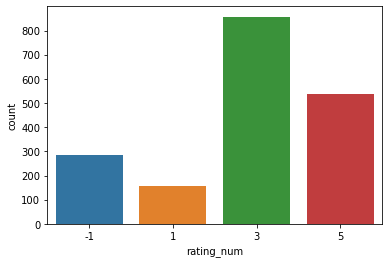

In [37]:
sns.countplot(skincare_ingredients.rating_num)

In [38]:
#create list of unknown ingredients
unknowns = defaultdict(int)
for row in range(len(df)):
    ingredients = df.ingredient_list[row]
    for i in ingredients:
        match = False
        for j in skincare_ingredients.ingredient.to_list():
            if j in i:
                if (j not in problem_ingredients) or ((j in problem_ingredients) and (j == i)):
                    match = True
                    break
        if not match:
            unknowns[i]+=1

In [42]:
unknowns_df = pd.DataFrame(unknowns, index=['num_appearances']).T.reset_index()
unknowns_df.columns = ['name', 'counts']
#analyze ingredients with multiple names
multiple = unknowns_df[unknowns_df.name.str.contains('\(')]
multiple = multiple.copy()

In [43]:
multiple

,name,counts
0,brassica oleracea acephala (kale) extract,1
1,spinacia oleracea (spinach) leaf extract,3
2,chlorophyllin-copper complex (ci 75810),2
3,gardenia jasminoides (jasmine) fruit extract,1
7,carica papaya (papaya) fruit extract,8
...,...,...
2206,cedrus atlantica (cedar) wood oil,1
2216,calophyllum inophyllum (tamanu) oil,1
2217,wildcrafted theobroma grandiflorum (cupuacu) s...,1
2218,wildcrafted mauritia flexuosa (buriti) fruit oil,1


In [44]:
#split ingredient names
multiple['split'] = multiple.name.str.split('(')
multiple['first']= multiple.split.str.get(0)
multiple['second'] = multiple.split.str.get(1)
multiple['second'] = multiple.second.str.replace(')', '')
multiple.drop('split', axis=1, inplace=True)

In [45]:
#create rating column 
multiple['rating'] = np.nan

In [46]:
multiple.head()

,name,counts,first,second,rating
0,brassica oleracea acephala (kale) extract,1,brassica oleracea acephala,kale extract,NaN
1,spinacia oleracea (spinach) leaf extract,3,spinacia oleracea,spinach leaf extract,NaN
2,chlorophyllin-copper complex (ci 75810),2,chlorophyllin-copper complex,ci 75810,NaN
3,gardenia jasminoides (jasmine) fruit extract,1,gardenia jasminoides,jasmine fruit extract,NaN
7,carica papaya (papaya) fruit extract,8,carica papaya,papaya fruit extract,NaN


In [48]:
#loop through ingredients with multiple names and check if unknown ingredient matches either name
no_match = []
for i in multiple.index:
    match = False
    for j in range(len(skincare_ingredients)):
        if skincare_ingredients.ingredient[j] not in problem_ingredients:
            if (multiple.loc[i]['first'] in skincare_ingredients.ingredient[j]) or (multiple.loc[i]['second'] in skincare_ingredients.ingredient[j]):
                match = True
                multiple.loc[i, 'rating'] = skincare_ingredients.rating_num[j]
                break
            if (skincare_ingredients.ingredient[j] in multiple.loc[i]['first']) or (skincare_ingredients.ingredient[j] in multiple.loc[i]['second']):
                match = True
                multiple.loc[i, 'rating'] = skincare_ingredients.rating_num[j]
                break
        else:
            if skincare_ingredients.ingredient[j] == multiple.loc[i]['first'] or skincare_ingredients.ingredient[j] == multiple.loc[i]['second']:
                match = True
                multiple.loc[i, 'rating'] = skincare_ingredients.rating_num[j]
    if not match:
        no_match.append(multiple.loc[i].name)
                    

In [49]:
len(no_match)

251

In [51]:
#copy over word ratings
matches = multiple[multiple.rating.notnull()]
matches = matches.copy()
mapping = {-1:'Poor', 1:'Average', 3:'Good', 5:'Best'}
matches['word_rating'] = matches.rating.map(mapping)
matches

,name,counts,first,second,rating,word_rating
9,zingiber officinale (ginger) root oil,8,zingiber officinale,ginger root oil,1.0,Average
23,oryza sativa (rice) powder,1,oryza sativa,rice powder,5.0,Best
32,salvia sclarea (clary) oil,8,salvia sclarea,clary oil,-1.0,Poor
33,santalum album (sandalwood) oil,6,santalum album,sandalwood oil,-1.0,Poor
36,oryza sativa (rice) bran,1,oryza sativa,rice bran,5.0,Best
...,...,...,...,...,...,...
2197,alcohol (organic),1,alcohol,organic,-1.0,Poor
2199,carthamus tinctorius (safflower) seed oil (org...,1,carthamus tinctorius,safflower seed oil,5.0,Best
2206,cedrus atlantica (cedar) wood oil,1,cedrus atlantica,cedar wood oil,-1.0,Poor
2216,calophyllum inophyllum (tamanu) oil,1,calophyllum inophyllum,tamanu oil,3.0,Good


In [54]:
#update ingredient descriptions
index = len(skincare_ingredients)
for i in range(len(matches)):
    skincare_ingredients.loc[index] = [matches.iloc[i]['name'], np.nan, "see '"+ matches.iloc[i]['first']+ "' or '"+matches.iloc[i]['second']+"'", matches.iloc[i]['word_rating'], matches.iloc[i]['rating']]
    index +=1

In [55]:
skincare_ingredients

,ingredient,category,description,rating,rating_num
0,2-hexanediol,preservatives,A preservative belonging to a class of agents ...,Good,3.0
1,10-hydroxydecanoic acid,emollients,A synthetic ingredient that functions as a ski...,Good,3.0
2,4-t-butylcyclohexanol,"emollients, skin-soothing",NaN,Good,3.0
3,acacia farnesiana extract,"plant extracts, fragrance: synthetic and fragr...",A fragrant extract from a type of acacia tree....,Poor,-1.0
4,acacia senegal gum,"texture enhancer, plant extracts, skin-soothing","Herb that can have skin soothing properties, b...",Good,3.0
...,...,...,...,...,...
2055,alcohol (organic),NaN,see 'alcohol ' or 'organic',Poor,-1.0
2056,carthamus tinctorius (safflower) seed oil (org...,NaN,see 'carthamus tinctorius ' or 'safflower seed...,Best,5.0
2057,cedrus atlantica (cedar) wood oil,NaN,see 'cedrus atlantica ' or 'cedar wood oil',Poor,-1.0
2058,calophyllum inophyllum (tamanu) oil,NaN,see 'calophyllum inophyllum ' or 'tamanu oil',Good,3.0


In [64]:
df

,url,category,brand,name,rating,price,descriptions,productsize,ingredient_list,num_ingredients,...,dry,oily,combination,sensitive,redness,acne,aging,spots,dull,normal
0,https://www.sephora.com/product/kale-spinach-g...,cleanser,Youth To The People,Superfood Antioxidant Cleanser,4.3,36.0,what it is: an award-winning face wash with co...,8 oz,"[water, cocamidopropyl hydroxysultaine, sodium...",29,...,True,True,True,False,False,False,True,False,True,True
1,https://www.sephora.com/product/soy-face-clean...,cleanser,Fresh,Soy Makeup Removing Face Wash,4.4,38.0,what it is: a bestselling three-in-one face wa...,5.1 oz,"[water, coco-glucoside, glycerin, butylene gly...",38,...,True,True,True,True,False,False,False,False,True,True
2,https://www.sephora.com/product/green-clean-ma...,cleanser,Farmacy,Green Clean Makeup Removing Cleansing Balm,4.5,34.0,what it is: a makeup remover and face cleanser...,3.4 oz,"[cetyl ethylhexanoate, caprylic/capric triglyc...",33,...,True,True,True,False,False,False,True,False,True,True
3,https://www.sephora.com/product/the-deep-clean...,cleanser,Tatcha,The Deep Cleanse Gentle Exfoliating Cleanser,4.2,38.0,which skin type is it good for?\n✔ normal\n✔ o...,5 oz,"[water, sodium cocoyl glutamate, propanediol, ...",22,...,True,True,True,True,False,False,False,False,True,True
4,https://www.sephora.com/product/tatcha-the-ric...,cleanser,Tatcha,The Rice Wash Skin-Softening Cleanser,4.6,35.0,"what it is: a ph-neutral, daily cream cleanser...",4.0 oz,"[aqua/water/eau, microcrystalline cellulose, p...",23,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,https://www.sephora.com/product/day-cream-broa...,sunscreen,Anthony,Day Cream Broad Spectrum Sunscreen SPF 30,3.7,34.0,which skin type is it good for?\n✔ normal\n✔ o...,3 oz,"[water, caprylic/capric triglyceride, corn sta...",24,...,True,True,True,True,False,False,False,False,True,True
1212,https://www.sephora.com/product/sephora-collec...,sunscreen,SEPHORA COLLECTION,Sephora Collection x Avasol Tinted Mineral Sun...,3.4,18.0,"what it is: a reef-friendly, water-resistant, ...",2 oz,"[caprylic/capric triglyceride (coconut), simmo...",21,...,True,True,True,False,False,False,True,False,False,True
1213,https://www.sephora.com/product/bienfait-teint...,sunscreen,Lancôme,Bienfait Teinté Beauty Balm Sunscreen Broad Sp...,4.2,47.0,skin type:\n✔ normal\n✔ dry\n✔ combination\n✔ ...,1.7 oz,"[water, cyclopentasiloxane, cyclohexasiloxane,...",35,...,True,True,True,True,False,False,False,False,False,True
1214,https://www.sephora.com/product/city-block-she...,sunscreen,CLINIQUE,City Block Sheer Oil-Free Daily Face Protector...,4.1,28.0,what it is:\na lightweight daily sunscreen tha...,1.4 oz,"[titanium dioxide 730%, zinc oxide 690%water, ...",61,...,False,False,False,True,False,False,False,False,False,False


In [65]:
#save dataframes
skincare_ingredients.to_csv("edited skincare dictionary.csv")

In [66]:
df.to_csv("df cleaned.csv")